In [43]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split

1.1) Завантажити та оглянути набір даних.

In [44]:
df = pd.read_excel('data/filledfinaldata.xlsx', sheet_name='Sheet1', header=0, index_col=0).reset_index()

df

,City,Year,Active Case Finding TB cases diagnosed among tested,Active Case Finding TB Presumptive TB cases tested out of those screened,MDR/RR TB DIAGNOSED MDR/RR patient diagnosed,Paediatric TB patients notified,TB case notification total,TB Cases Notified Female,TB Cases Notified Male,TB patients with known Tobacco usage status,...,Treatment outcome of TB-HIV patients notified in (Death Rate),Treatment outcome of TB-HIV patients notified in (Success Rate),PMDT- Infrastructure No. of Nodal DR-TB centres,TB- DM patients initiated on Anti-diabetic treatment,Treatment outcome of Paediatric TB patients notified in (Death Rate),Treatment outcome of Paediatric TB patients notified in (Success Rate),Pregnant TB patients identified,TB - DM Patients diagnosed among tested,TB patients with known Alcohol usage status,TB-COVID 19 patients detected
0,Andaman & Nicobar Islands,2019,6,103,60,37,144,214,344,137,...,0,75,1,48,0,23,0,92,425,0
1,Andhra Pradesh,2019,1771,35785,1924,3641,176,29046,61977,47090,...,11,83,4,4735,26,3090,83,9045,69442,222
2,Arunachal Pradesh,2019,27,1535,173,462,216,1545,1871,602,...,0,75,5,48,5,314,0,47,2219,1
3,Assam,2019,547,7114,588,1664,126,14142,28732,8199,...,12,57,6,966,28,1271,29,2081,22463,55
4,Bihar,2019,2483,51380,4055,10691,87,37322,67489,6081,...,4,66,7,1446,171,8279,185,4742,58337,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Tripura,2022,39,3041,20,44,64,542,1593,2000,...,6,15,1,179,0,33,7,407,1862,9
144,Uttar Pradesh,2022,25080,232920,12339,21323,192,150653,212835,282077,...,261,1505,22,7939,541,18625,707,20422,265676,302
145,Uttarakhand,2022,278,3612,490,947,193,8074,11595,16811,...,29,160,3,665,21,822,44,1407,16221,45
146,West Bengal,2022,1855,187606,2372,2472,90,25416,52038,78595,...,117,461,9,8437,45,2085,198,11853,77045,438


In [45]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 26 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   City                                                                      148 non-null    object 
 1   Year                                                                      148 non-null    int64  
 2   Active Case Finding TB cases diagnosed among tested                       148 non-null    int64  
 3   Active Case Finding TB Presumptive TB cases tested out of those screened  148 non-null    int64  
 4   MDR/RR TB DIAGNOSED MDR/RR patient diagnosed                              148 non-null    int64  
 5   Paediatric TB patients notified                                           148 non-null    int64  
 6   TB case notification total                                        

In [46]:
columns_renamed = { column: index for index, column in enumerate(df) }

columns_renamed

{'City': 0,
 'Year': 1,
 'Active Case Finding TB cases diagnosed among tested': 2,
 'Active Case Finding TB Presumptive TB cases tested out of those screened': 3,
 'MDR/RR TB DIAGNOSED MDR/RR patient diagnosed': 4,
 'Paediatric TB patients notified': 5,
 'TB case notification total': 6,
 'TB Cases Notified Female': 7,
 'TB Cases Notified Male': 8,
 'TB patients with known Tobacco usage status': 9,
 'TB-HIV co-infected patients Diagnosed': 10,
 'TB-HIV co-infected patients Put on ART': 11,
 'Treatment outcome of TB patients notified in (% Lost to follow up)': 12,
 'Treatment outcome of TB patients notified in (Death Rate)': 13,
 'Treatment outcome of TB patients notified in (Success Rate)': 14,
 'Treatment outcome of TB patients notified in (Treatment Failure Rate)': 15,
 'Treatment outcome of TB-HIV patients notified in (Death Rate)': 16,
 'Treatment outcome of TB-HIV patients notified in (Success Rate)': 17,
 'PMDT- Infrastructure No. of Nodal DR-TB centres': 18,
 'TB- DM patients ini

1.2) Перевірити наявність пропущених значень.
1.3) 1.3 Видалити або заповнити пропущені значення (за потреби).

There are no empty cells. I have cheched all 25 fields by two filters:

df[df["column_name"].isnull()] 
df[df["column_name"].isna()] 

1.4) Виключити нерелевантні змінні (наприклад, текстові колонки).

All fields have two types: int64 and float64

1.5) Виконати стандартизацію числових даних

In [47]:
scaler = MinMaxScaler() # Standardization and its value ranges between (-1 to +1) 
# scaler = StandardScaler() # Standardization and its value ranges between (-3 to +3)


In [48]:
columns_exclude_year_city = df.columns.difference(['Year', 'City'])
columns_exclude_year_city_total = columns_exclude_year_city.difference(['TB case notification total'])

In [49]:
df_year = df[['Year']]

df_year[['Year']].value_counts()

Year
2019    37
2020    37
2021    37
2022    37
Name: count, dtype: int64

In [50]:
df_scaled_exclude_year_city = pd.DataFrame(index=df.index, columns=columns_exclude_year_city)

df_scaled_exclude_year_city[columns_exclude_year_city] = scaler.fit_transform(df[columns_exclude_year_city].to_numpy())

df_scaled_exclude_year_city


,Active Case Finding TB Presumptive TB cases tested out of those screened,Active Case Finding TB cases diagnosed among tested,MDR/RR TB DIAGNOSED MDR/RR patient diagnosed,PMDT- Infrastructure No. of Nodal DR-TB centres,Paediatric TB patients notified,Pregnant TB patients identified,TB - DM Patients diagnosed among tested,TB Cases Notified Female,TB Cases Notified Male,TB case notification total,...,TB-HIV co-infected patients Diagnosed,TB-HIV co-infected patients Put on ART,Treatment outcome of Paediatric TB patients notified in (Death Rate),Treatment outcome of Paediatric TB patients notified in (Success Rate),Treatment outcome of TB patients notified in (% Lost to follow up),Treatment outcome of TB patients notified in (Death Rate),Treatment outcome of TB patients notified in (Success Rate),Treatment outcome of TB patients notified in (Treatment Failure Rate),Treatment outcome of TB-HIV patients notified in (Death Rate),Treatment outcome of TB-HIV patients notified in (Success Rate)
0,0.000050,0.000081,0.000906,0.006173,0.000245,0.000000,0.000578,0.000236,0.000222,0.214286,...,0.000041,0.000045,0.000000,0.000163,0.000030,0.000035,0.000040,0.000036,0.000000,0.002373
1,0.017486,0.024006,0.029039,0.024691,0.024067,0.020504,0.057427,0.032587,0.041004,0.268707,...,0.141171,0.142945,0.010526,0.023993,0.000031,0.000048,0.000040,0.000073,0.002042,0.002626
2,0.000750,0.000366,0.002611,0.030864,0.003054,0.000000,0.000292,0.001729,0.001233,0.336735,...,0.000061,0.000000,0.002024,0.002424,0.000068,0.000020,0.000030,0.000116,0.000000,0.002373
3,0.003476,0.007415,0.008875,0.037037,0.010999,0.007164,0.013208,0.015864,0.019006,0.183673,...,0.005668,0.005422,0.011336,0.009860,0.000071,0.000042,0.000033,0.000065,0.002227,0.001804
4,0.025107,0.033658,0.061203,0.043210,0.070667,0.045702,0.030104,0.041874,0.044651,0.117347,...,0.030542,0.025817,0.069231,0.064310,0.000049,0.000023,0.000030,0.000036,0.000742,0.002088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.001486,0.000529,0.000302,0.006173,0.000291,0.001729,0.002578,0.000604,0.001049,0.078231,...,0.000816,0.000907,0.000000,0.000241,0.000615,0.001770,0.000905,0.000653,0.001114,0.000475
144,0.113816,0.339966,0.186235,0.135802,0.140945,0.174654,0.129669,0.169039,0.140824,0.295918,...,0.050034,0.052858,0.219028,0.144696,0.146115,0.166027,0.159384,0.148683,0.048441,0.047624
145,0.001765,0.003768,0.007396,0.018519,0.006260,0.010870,0.008928,0.009055,0.007667,0.297619,...,0.002467,0.001906,0.008502,0.006371,0.007552,0.008272,0.008604,0.007547,0.005382,0.005063
146,0.091674,0.025145,0.035801,0.055556,0.016340,0.048913,0.075257,0.028514,0.034427,0.122449,...,0.020327,0.020712,0.018219,0.016184,0.019138,0.048095,0.034184,0.033887,0.021715,0.014588


2.1) Дослідити кореляції між змінними за допомогою теплової карти.

In [51]:
columns_renamed = { column: index for index, column in enumerate(df) }

columns_renamed

{'City': 0,
 'Year': 1,
 'Active Case Finding TB cases diagnosed among tested': 2,
 'Active Case Finding TB Presumptive TB cases tested out of those screened': 3,
 'MDR/RR TB DIAGNOSED MDR/RR patient diagnosed': 4,
 'Paediatric TB patients notified': 5,
 'TB case notification total': 6,
 'TB Cases Notified Female': 7,
 'TB Cases Notified Male': 8,
 'TB patients with known Tobacco usage status': 9,
 'TB-HIV co-infected patients Diagnosed': 10,
 'TB-HIV co-infected patients Put on ART': 11,
 'Treatment outcome of TB patients notified in (% Lost to follow up)': 12,
 'Treatment outcome of TB patients notified in (Death Rate)': 13,
 'Treatment outcome of TB patients notified in (Success Rate)': 14,
 'Treatment outcome of TB patients notified in (Treatment Failure Rate)': 15,
 'Treatment outcome of TB-HIV patients notified in (Death Rate)': 16,
 'Treatment outcome of TB-HIV patients notified in (Success Rate)': 17,
 'PMDT- Infrastructure No. of Nodal DR-TB centres': 18,
 'TB- DM patients ini

In [52]:
df_scaled_exclude_year_city_total = df_scaled_exclude_year_city[columns_exclude_year_city_total]

df_scaled_exclude_year_city_total

,Active Case Finding TB Presumptive TB cases tested out of those screened,Active Case Finding TB cases diagnosed among tested,MDR/RR TB DIAGNOSED MDR/RR patient diagnosed,PMDT- Infrastructure No. of Nodal DR-TB centres,Paediatric TB patients notified,Pregnant TB patients identified,TB - DM Patients diagnosed among tested,TB Cases Notified Female,TB Cases Notified Male,TB patients with known Alcohol usage status,...,TB-HIV co-infected patients Diagnosed,TB-HIV co-infected patients Put on ART,Treatment outcome of Paediatric TB patients notified in (Death Rate),Treatment outcome of Paediatric TB patients notified in (Success Rate),Treatment outcome of TB patients notified in (% Lost to follow up),Treatment outcome of TB patients notified in (Death Rate),Treatment outcome of TB patients notified in (Success Rate),Treatment outcome of TB patients notified in (Treatment Failure Rate),Treatment outcome of TB-HIV patients notified in (Death Rate),Treatment outcome of TB-HIV patients notified in (Success Rate)
0,0.000050,0.000081,0.000906,0.006173,0.000245,0.000000,0.000578,0.000236,0.000222,0.000265,...,0.000041,0.000045,0.000000,0.000163,0.000030,0.000035,0.000040,0.000036,0.000000,0.002373
1,0.017486,0.024006,0.029039,0.024691,0.024067,0.020504,0.057427,0.032587,0.041004,0.045312,...,0.141171,0.142945,0.010526,0.023993,0.000031,0.000048,0.000040,0.000073,0.002042,0.002626
2,0.000750,0.000366,0.002611,0.030864,0.003054,0.000000,0.000292,0.001729,0.001233,0.001436,...,0.000061,0.000000,0.002024,0.002424,0.000068,0.000020,0.000030,0.000116,0.000000,0.002373
3,0.003476,0.007415,0.008875,0.037037,0.010999,0.007164,0.013208,0.015864,0.019006,0.014649,...,0.005668,0.005422,0.011336,0.009860,0.000071,0.000042,0.000033,0.000065,0.002227,0.001804
4,0.025107,0.033658,0.061203,0.043210,0.070667,0.045702,0.030104,0.041874,0.044651,0.038064,...,0.030542,0.025817,0.069231,0.064310,0.000049,0.000023,0.000030,0.000036,0.000742,0.002088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.001486,0.000529,0.000302,0.006173,0.000291,0.001729,0.002578,0.000604,0.001049,0.001203,...,0.000816,0.000907,0.000000,0.000241,0.000615,0.001770,0.000905,0.000653,0.001114,0.000475
144,0.113816,0.339966,0.186235,0.135802,0.140945,0.174654,0.129669,0.169039,0.140824,0.173393,...,0.050034,0.052858,0.219028,0.144696,0.146115,0.166027,0.159384,0.148683,0.048441,0.047624
145,0.001765,0.003768,0.007396,0.018519,0.006260,0.010870,0.008928,0.009055,0.007667,0.010575,...,0.002467,0.001906,0.008502,0.006371,0.007552,0.008272,0.008604,0.007547,0.005382,0.005063
146,0.091674,0.025145,0.035801,0.055556,0.016340,0.048913,0.075257,0.028514,0.034427,0.050274,...,0.020327,0.020712,0.018219,0.016184,0.019138,0.048095,0.034184,0.033887,0.021715,0.014588


In [53]:
df_scaled_total = df_scaled_exclude_year_city[['TB case notification total']]
df_scaled_total

,TB case notification total
0,0.214286
1,0.268707
2,0.336735
3,0.183673
4,0.117347
...,...
143,0.078231
144,0.295918
145,0.297619
146,0.122449


In [54]:
df_scaled_formatted = df_scaled_exclude_year_city_total.rename(columns=columns_renamed)
df_scaled_formatted

,3,2,4,18,5,22,23,7,8,24,...,10,11,20,21,12,13,14,15,16,17
0,0.000050,0.000081,0.000906,0.006173,0.000245,0.000000,0.000578,0.000236,0.000222,0.000265,...,0.000041,0.000045,0.000000,0.000163,0.000030,0.000035,0.000040,0.000036,0.000000,0.002373
1,0.017486,0.024006,0.029039,0.024691,0.024067,0.020504,0.057427,0.032587,0.041004,0.045312,...,0.141171,0.142945,0.010526,0.023993,0.000031,0.000048,0.000040,0.000073,0.002042,0.002626
2,0.000750,0.000366,0.002611,0.030864,0.003054,0.000000,0.000292,0.001729,0.001233,0.001436,...,0.000061,0.000000,0.002024,0.002424,0.000068,0.000020,0.000030,0.000116,0.000000,0.002373
3,0.003476,0.007415,0.008875,0.037037,0.010999,0.007164,0.013208,0.015864,0.019006,0.014649,...,0.005668,0.005422,0.011336,0.009860,0.000071,0.000042,0.000033,0.000065,0.002227,0.001804
4,0.025107,0.033658,0.061203,0.043210,0.070667,0.045702,0.030104,0.041874,0.044651,0.038064,...,0.030542,0.025817,0.069231,0.064310,0.000049,0.000023,0.000030,0.000036,0.000742,0.002088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.001486,0.000529,0.000302,0.006173,0.000291,0.001729,0.002578,0.000604,0.001049,0.001203,...,0.000816,0.000907,0.000000,0.000241,0.000615,0.001770,0.000905,0.000653,0.001114,0.000475
144,0.113816,0.339966,0.186235,0.135802,0.140945,0.174654,0.129669,0.169039,0.140824,0.173393,...,0.050034,0.052858,0.219028,0.144696,0.146115,0.166027,0.159384,0.148683,0.048441,0.047624
145,0.001765,0.003768,0.007396,0.018519,0.006260,0.010870,0.008928,0.009055,0.007667,0.010575,...,0.002467,0.001906,0.008502,0.006371,0.007552,0.008272,0.008604,0.007547,0.005382,0.005063
146,0.091674,0.025145,0.035801,0.055556,0.016340,0.048913,0.075257,0.028514,0.034427,0.050274,...,0.020327,0.020712,0.018219,0.016184,0.019138,0.048095,0.034184,0.033887,0.021715,0.014588


Text(0.5, 1.0, 'Correlation Matrix of Scaled Data')

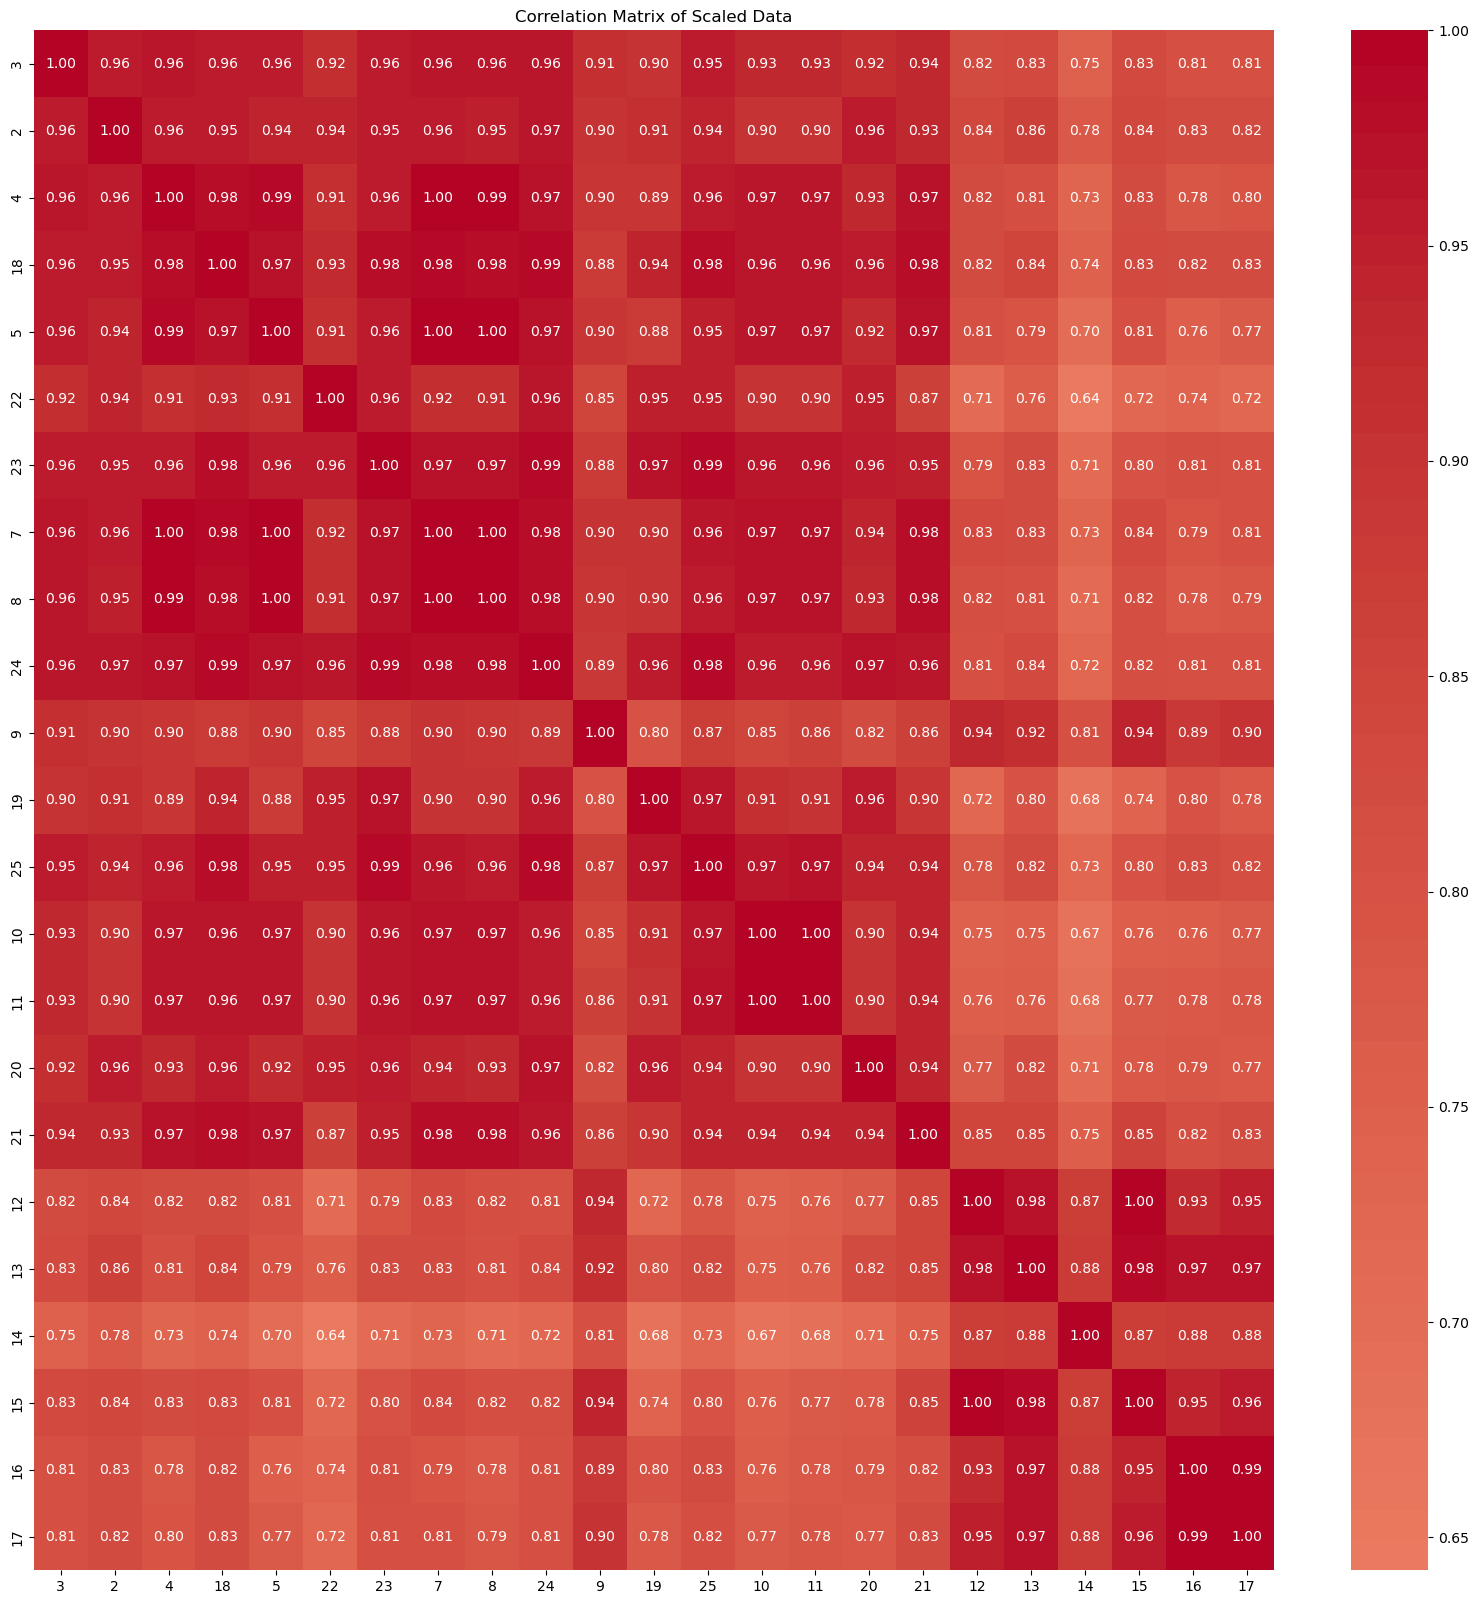

In [55]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df_scaled_formatted.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, ax=ax)

plt.title('Correlation Matrix of Scaled Data')

2.2) Зобразити розподіл цільової змінної (“TB case notification total”)

array([[<Axes: title={'center': 'TB case notification total'}>]],
      dtype=object)

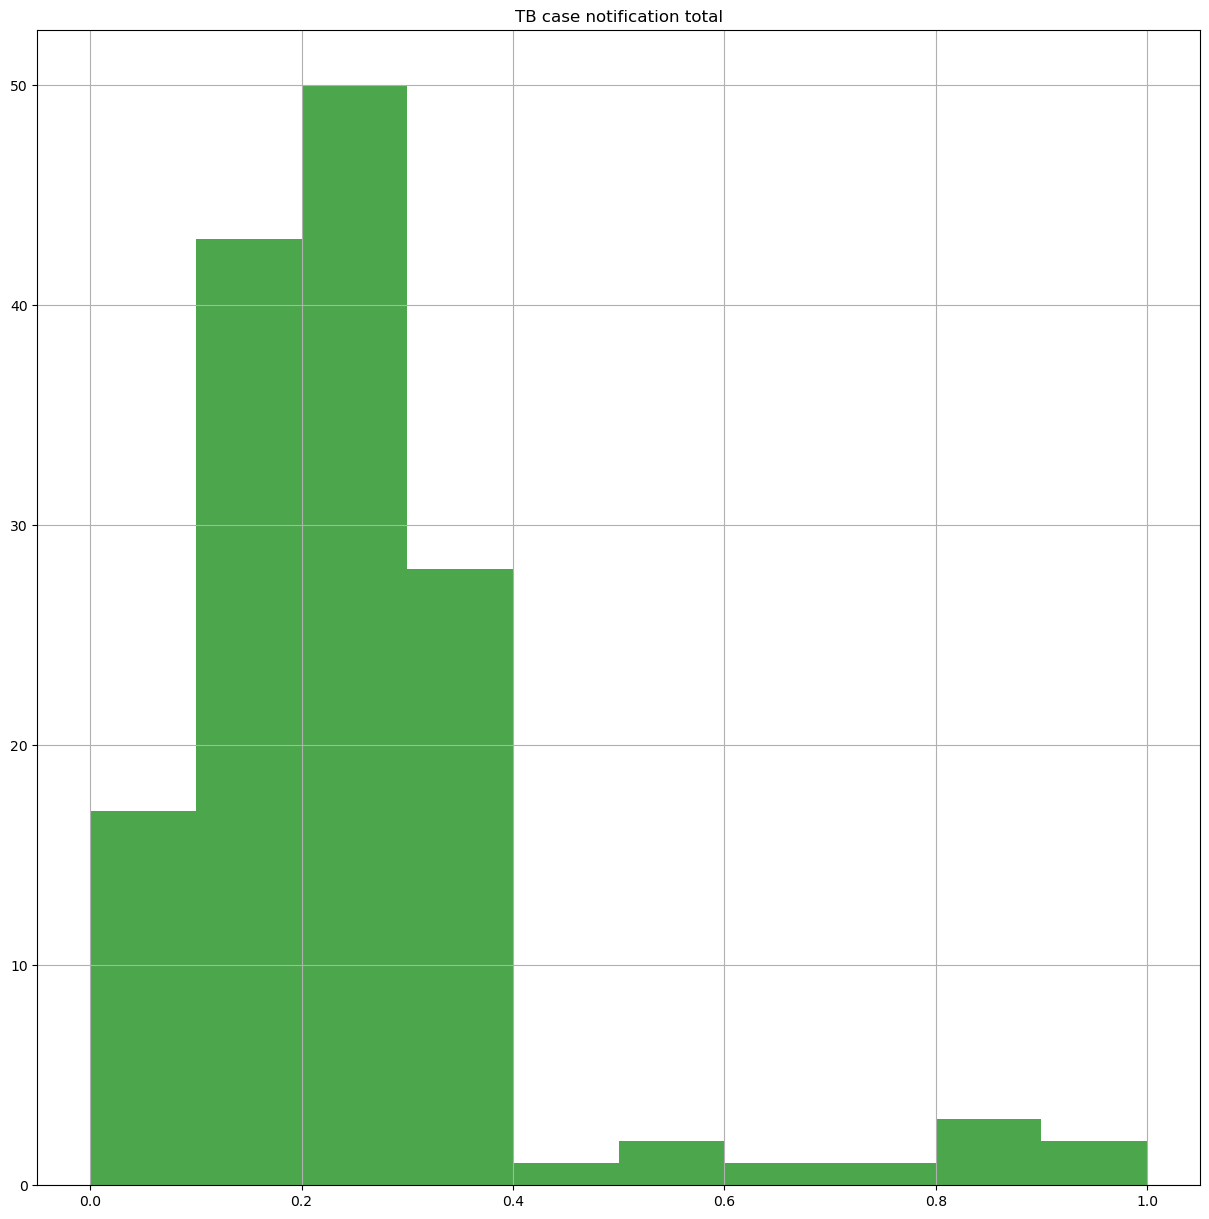

In [56]:
df_scaled_total.hist(figsize=(15, 15), bins=10, column="TB case notification total", color='green', alpha=0.7)

2.3) Побудувати парні графіки (scatter plots) між ключовими факторами та цільовою змінною.

/opt/anaconda3/envs/ml/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


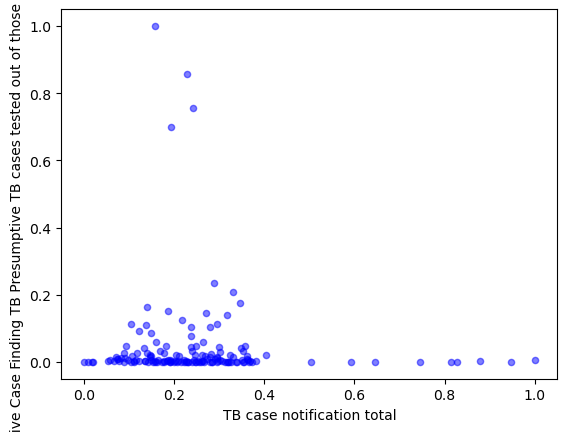

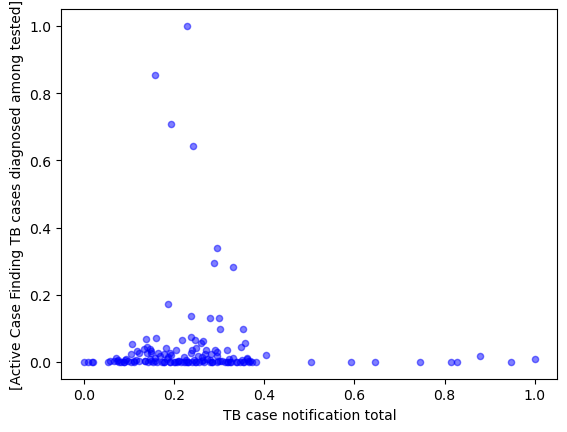

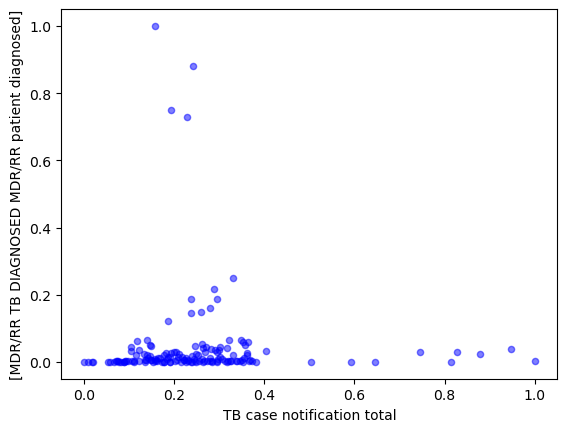

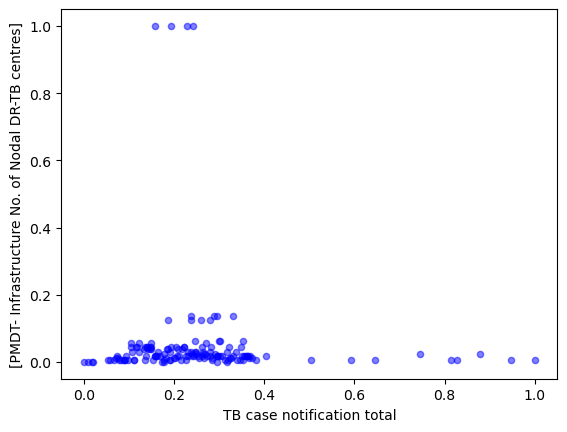

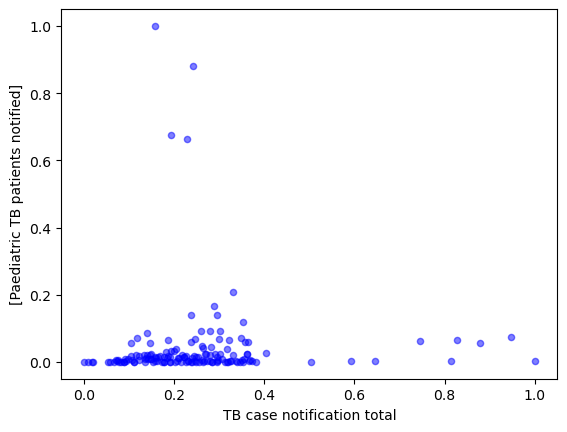

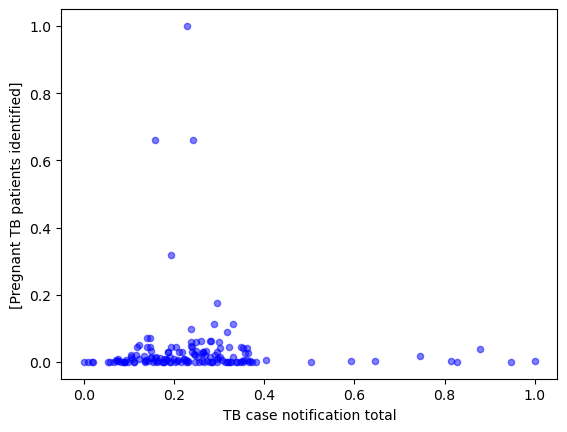

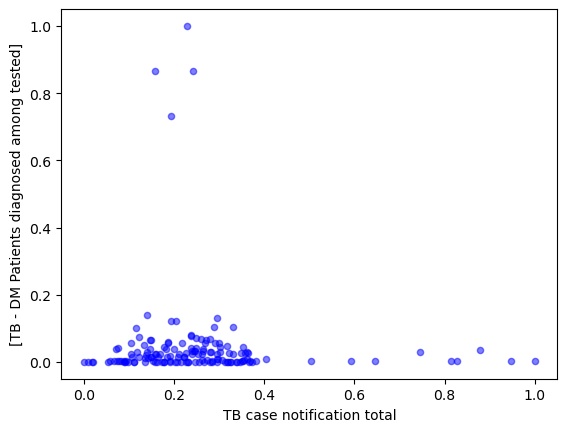

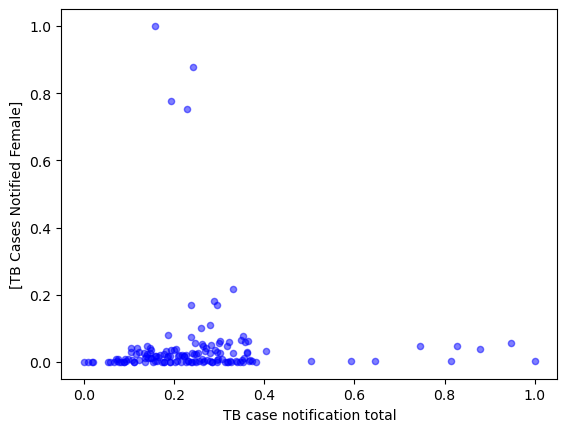

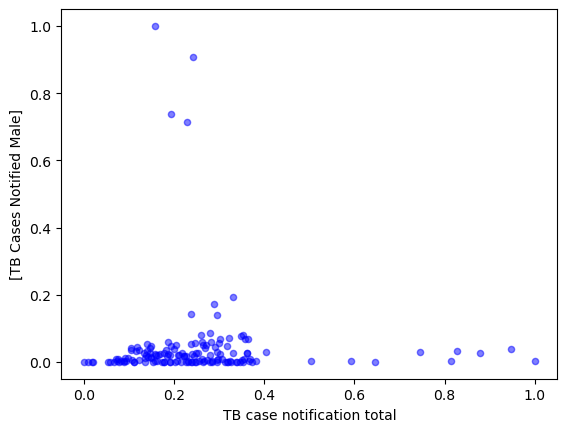

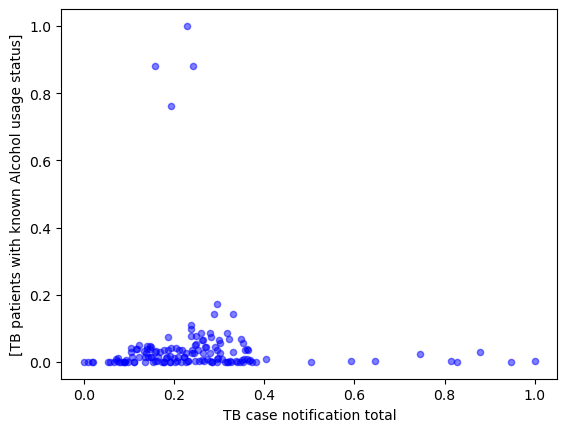

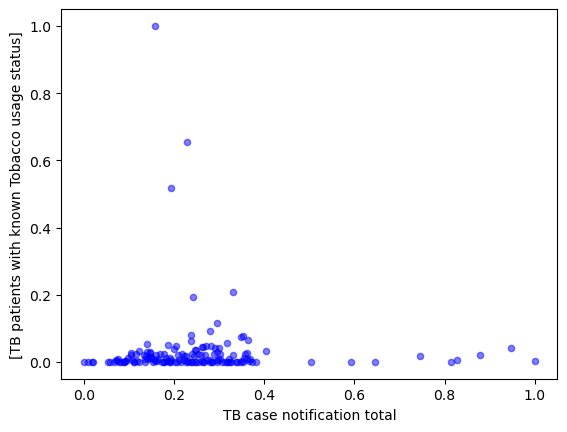

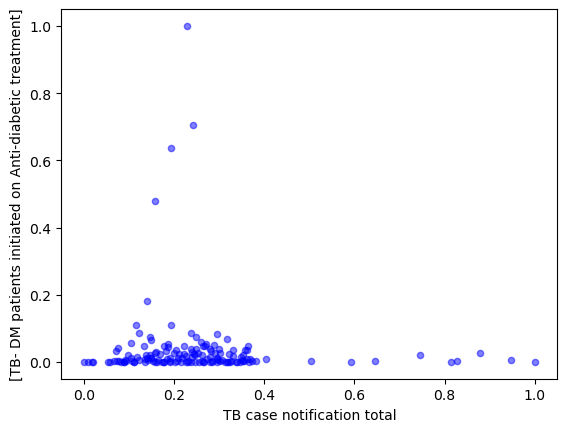

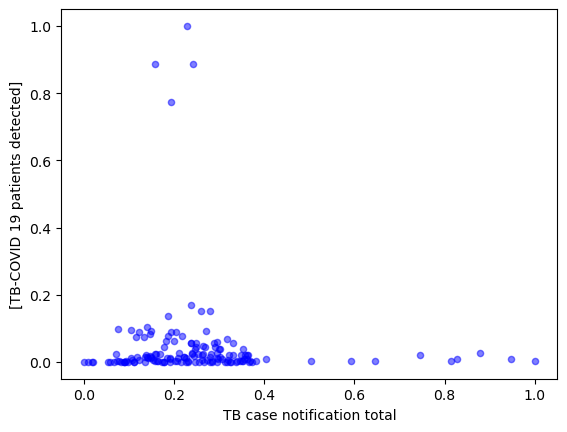

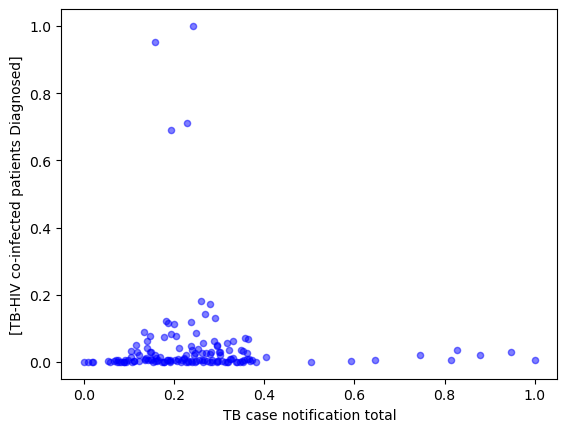

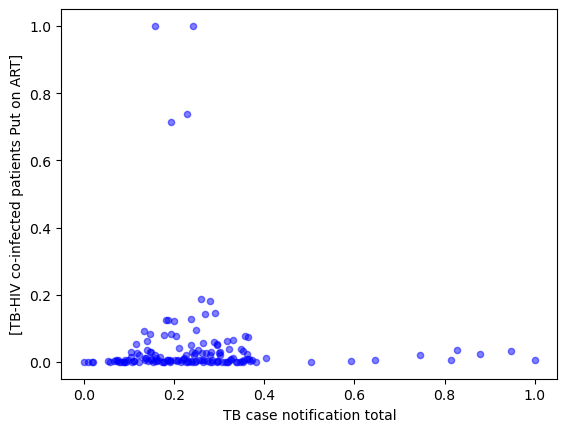

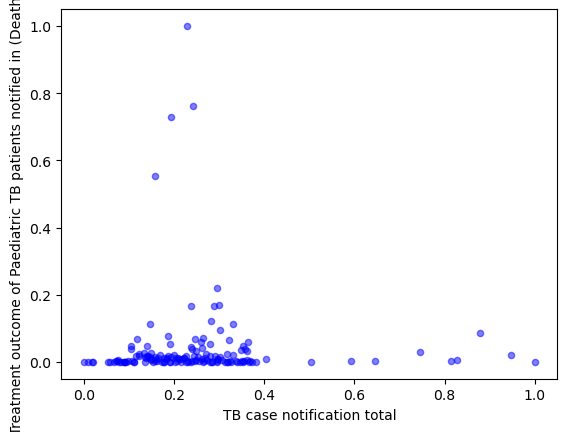

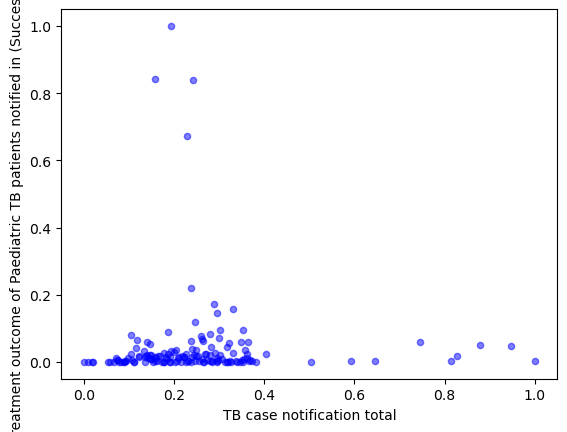

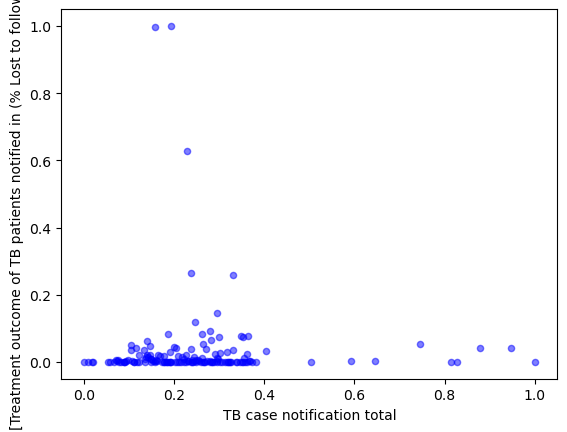

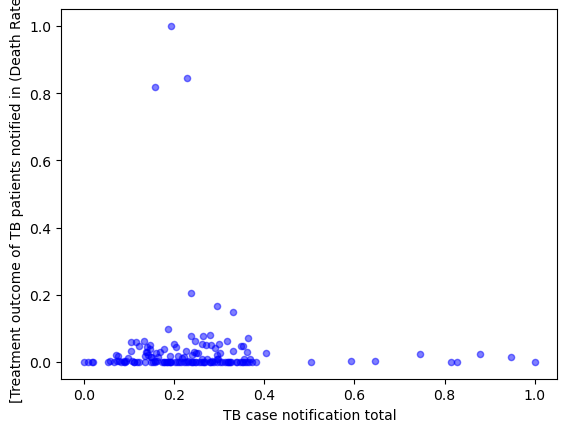

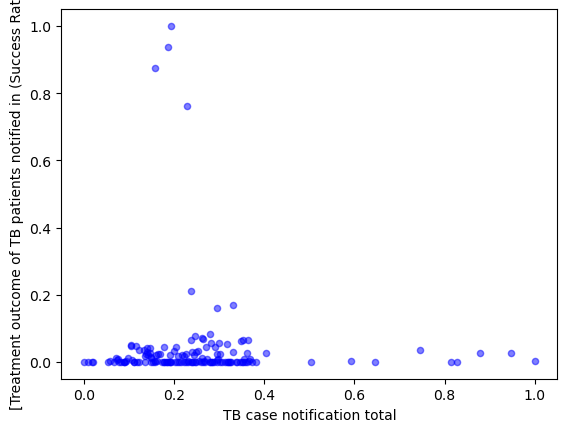

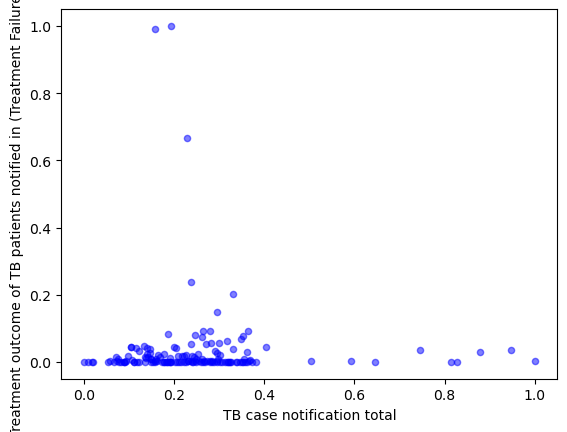

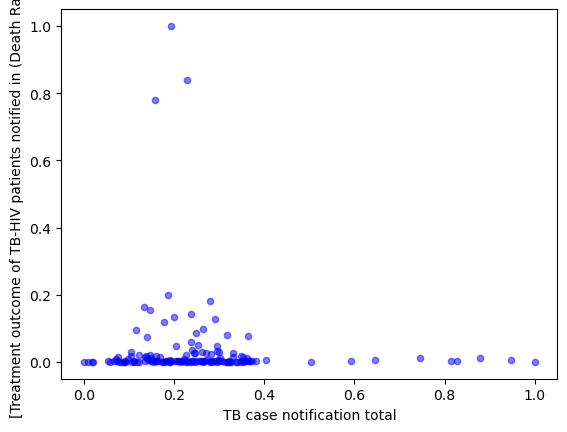

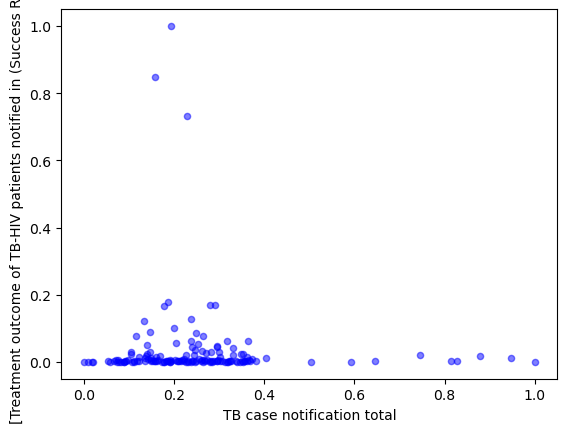

In [57]:
for index, column in enumerate(columns_exclude_year_city_total):
    df_scaled_exclude_year_city.plot(x='TB case notification total', y=[column], kind="scatter", color='blue', alpha=0.5)


3.1) Реалізувати та навчити Лінійну регресію
3.2) Виконати прогнозування на навчальні та тестовій вибірці та з використанням крос валідації.
3.3) Оцінити точність моделей за метриками RMSE та R².

In [58]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled_exclude_year_city_total, df_scaled_total, test_size=0.2)

len(x_train), len(x_test), len(y_train), len(y_test)

(118, 30, 118, 30)

In [59]:
def print_calc(predict_train, predict_test, y_train, y_test):
      predict_train_mse = mean_squared_error(y_train, predict_train)
      print("predict_train_mse: ", predict_train_mse)

      predict_test_mse = mean_squared_error(y_test, predict_test)
      print("predict_test_mse: ", predict_test_mse)

      mean_squared_error_train = mean_squared_error(y_train, predict_train)
      print("mean_squared_error_train: ", mean_squared_error_train)

      mean_squared_error_test = mean_squared_error(y_test, predict_test)
      print("mean_squared_error_test: ", mean_squared_error_test)

      r2_score_train = r2_score(y_train, predict_train)
      print("r2_score_train: ", r2_score_train)
      
      r2_score_test = r2_score(y_test, predict_test)
      print("r2_score_test: ", r2_score_test)

In [60]:
def run_regression_model(model):
      model.fit(x_train, y_train)

      model.score(x_test, y_test)
      model.score(x_train, y_train)
      predict_train = model.predict(x_train)
      predict_test = model.predict(x_test)

      cross_score = cross_val_score(model, x_train, y_train, cv=10, scoring="r2")
      print("cross_val_score: ", cross_score[0:5])

      cross_predict_train = cross_val_predict(model, x_train, y_train, cv=10)
      print("cross_val_predict_train: ", cross_predict_train[0:5])

      cross_predict_test = cross_val_predict(model, x_test, y_test, cv=10)
      print("cross_val_predict_train: ", cross_predict_test[0:5])

      print_calc(predict_train, predict_test, y_train, y_test)

      return model


In [61]:
linearRegression = run_regression_model(LinearRegression())

cross_val_score:  [ 0.17268332  0.62440516 -1.31517551 -5.0724216  -3.75238095]
cross_val_predict_train:  [[0.05721953]
 [0.1849878 ]
 [0.12525139]
 [0.09344897]
 [0.22012824]]
cross_val_predict_train:  [[ 2.21189065]
 [ 0.14103575]
 [ 3.38115425]
 [ 0.05710004]
 [-0.18680235]]
predict_train_mse:  0.017125337162175916
predict_test_mse:  0.025699051213282996
mean_squared_error_train:  0.017125337162175916
mean_squared_error_test:  0.025699051213282996
r2_score_train:  0.3714604804233954
r2_score_test:  0.004347348697061437


4.1) Використати Lasso та Ridge регресії.

In [80]:
ridge = run_regression_model(Ridge(alpha=1.0))

cross_val_score:  [-0.10215245 -0.15227203  0.00851343 -0.70444983 -0.12450807]
cross_val_predict_train:  [0.23546915 0.24557665 0.24712236 0.24298655 0.25024046]
cross_val_predict_train:  [0.27631857 0.28951192 0.27670978 0.2935212  0.29336625]
predict_train_mse:  0.02662178576051836
predict_test_mse:  0.02687174622205206
mean_squared_error_train:  0.02662178576051836
mean_squared_error_test:  0.02687174622205206
r2_score_train:  0.022918832270076295
r2_score_test:  -0.04108611438920007


In [81]:
lasso = run_regression_model(Lasso(alpha=1.0))

cross_val_score:  [-0.14409944 -0.18807099 -0.00704348 -0.50757025 -0.12612146]
cross_val_predict_train:  [0.24719227 0.24719227 0.24719227 0.24719227 0.24719227]
cross_val_predict_train:  [0.28804485 0.28804485 0.28804485 0.28489544 0.28489544]
predict_train_mse:  0.0272462377126451
predict_test_mse:  0.027540573625903158
mean_squared_error_train:  0.0272462377126451
mean_squared_error_test:  0.027540573625903158
r2_score_train:  0.0
r2_score_test:  -0.06699834641604685


r2_score_train = 0.0 WTF? 

4.2) Оптимізувати гіперпараметри “alpha” для Lasso та Ridge за допомогою GridSearchCV.

In [82]:
grid = GridSearchCV(ridge, {"alpha": [0.01, 0.1, 1., 10] }, cv=10, scoring="r2", return_train_score=True)
grid.fit(x_train, y_train)

best_estimator = grid.best_estimator_
best_estimator_score = best_estimator.score(x_train, y_train)

best_estimator_score


0.004232524826597861

In [83]:
predict_train = best_estimator.predict(x_train)
predict_test = best_estimator.predict(x_test)

print_calc(predict_train, predict_test, y_train, y_test)


predict_train_mse:  0.027130917335094942
predict_test_mse:  0.02735552676081745
mean_squared_error_train:  0.027130917335094942
mean_squared_error_test:  0.02735552676081745
r2_score_train:  0.004232524826597861
r2_score_test:  -0.0598291166920073


5.1) Використати модель отримані лінійні регресії для оцінки ваги кожного фактора для всіх моделей.

In [84]:
def print_coefficients(model):
      coefficients = model.coef_
      intercept = model.intercept_

      print("Coefficients: ", coefficients)
      print("Intercept: ", intercept)


In [85]:
print_coefficients(linearRegression)


Coefficients:  [[  0.41306367  -1.14546676  -4.96649295  -2.22808873   2.48440268
   -1.70500556  -3.01738426  22.00869553 -15.18211695   2.94369291
   -0.74365132   3.45102015   0.72772976 -12.3219018   10.92342921
    1.62083562  -2.73190676   0.56156697  -5.71185245  -0.11703068
    2.93104608  -2.73703542   4.2955237 ]]
Intercept:  [0.25229277]


In [88]:
print_coefficients(ridge)


Coefficients:  [-0.0557677  -0.00380377  0.02395869 -0.04798983  0.07338139  0.02047073
 -0.04383033  0.04766442  0.00899128 -0.00726093  0.01699702 -0.0260287
 -0.04339594 -0.01596273 -0.01710347  0.06569101  0.0401334   0.03261063
 -0.01212856 -0.01484448  0.01775731 -0.04675239 -0.03053274]
Intercept:  [0.24451524]


In [86]:
print_coefficients(lasso) # WTF with lasso coefficients?

Coefficients:  [-0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.]
Intercept:  [0.2429955]


5.2) Передбачити щоб код можна було легко доповнювати новими моделями без зміни самої структури коду. Реалізувати такі моделі:
	•	Дерево рішень
	•	Метод найближчих сусідів
	•	Метод опорних векторів (SVM)
	•	Випадковий ліс

In [6]:
def run_classifier_model(model):
      model.fit(x_train, y_train)

      return model

In [90]:
# desigionTree = run_classifier_model(DecisionTreeClassifier())

In [91]:
# kNeightbours = run_classifier_model(KNeighborsClassifier(n_neighbors=5))

In [92]:
# svc = run_classifier_model(SVC(kernel='linear', C=1.0, gamma='scale'))